In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, homogeneity_score

In [2]:
import pandas as pd

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
feature = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]

wine_data = pd.read_csv(dataset_url, names = feature)
print ("Dataset Lenght:: ", len(wine_data))
print ("Dataset Shape:: ", wine_data.shape)
wine_data.head()

Dataset Lenght::  178
Dataset Shape::  (178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = wine_data.drop('Cultivator',axis=1)
y = wine_data['Cultivator']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit to all data
scaler.fit(X)
X_scaled = scaler.transform(X)

/anaconda3/envs/RAMA/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/RAMA/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Dimension Reduction

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [8]:
# Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Cultivator
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


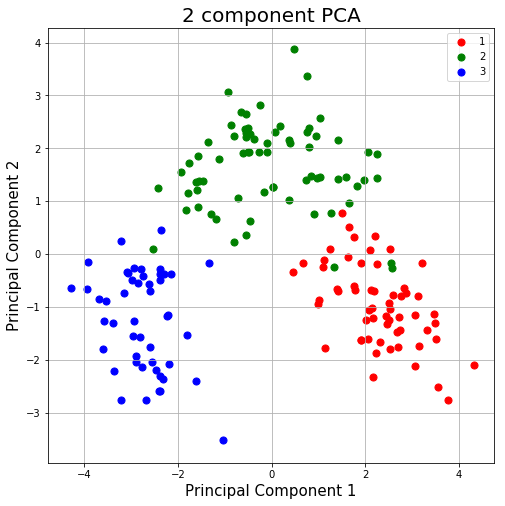

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Cultivators = [1, 2, 3]
colors = ['r', 'g', 'b']
for Cultivator, color in zip(Cultivators,colors):
    indicesToKeep = finalDf['Cultivator'] == Cultivator
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Cultivators)
ax.grid()

# K-Means

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

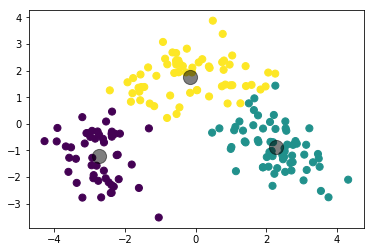

In [11]:
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [12]:
labels_true = finalDf['Cultivator'].values
clustering_predicted = y_kmeans

print('Homogeneity score is {:.4f}'.format(homogeneity_score(labels_true, clustering_predicted)))

Homogeneity score is 0.8840
